In [2]:
# Import library dan module yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import pandas as pd

In [3]:
# Membaca data training dan testing
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [4]:
# Mendapatkan label dari data training dan testing
y_train = train_df['label']
y_test = test_df['label']

In [5]:
# Menghapus kolom label dari data training dan testing
del train_df['label']
del test_df['label']

In [6]:
# Menggunakan LabelBinarizer untuk mengkonversi label menjadi bentuk biner
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [7]:
# Mengubah data training dan testing menjadi array
x_train = train_df.values
x_test = test_df.values

In [8]:
# Normalisasi data
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# Reshape data menjadi format yang sesuai dengan model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
# Inisialisasi ImageDataGenerator untuk augmentasi data
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

In [11]:
# Inisialisasi callback untuk mengurangi learning rate jika validasi accuracy tidak meningkat
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [12]:
# Inisialisasi model sequential
model = Sequential()

In [13]:
# Menambah layer convolutional, batch normalization, dan max pooling
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
# Flatten layer untuk mengubah menjadi vektor
model.add(Flatten())

In [15]:
# Dense layer dengan dropout
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))

In [16]:
# Output layer dengan softmax activation
model.add(Dense(units=24, activation='softmax'))

In [17]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Melatih model dengan menggunakan fit_generator dan callback untuk learning rate reduction
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.4743 - loss: 1.7793 - val_accuracy: 0.0991 - val_loss: 4.0033 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.9146 - loss: 0.2615 - val_accuracy: 0.4753 - val_loss: 1.5483 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.9634 - loss: 0.1167 - val_accuracy: 0.9612 - val_loss: 0.1383 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.9781 - loss: 0.0700 - val_accuracy: 0.9283 - val_loss: 0.2111 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.9852 - loss: 0.0489 - val_accuracy: 0.9922 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9679 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9902 - loss: 

In [19]:
# Menyimpan model
model.save('smnist.h5')

In [20]:
# Visualisasi grafik loss dan akurasi pada training dan validation set
sns.set()
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

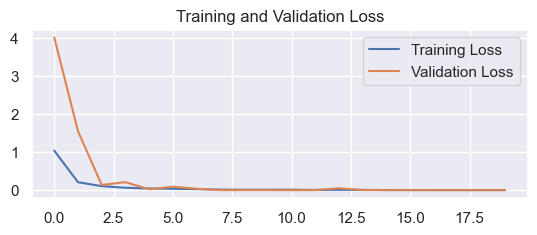

In [21]:
# Plot loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

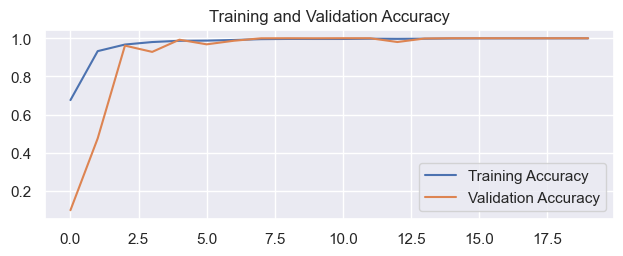

In [22]:
# Plot accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [24]:
# Evaluasi model menggunakan data testing
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       1.00      1.00      1.00       394
          12       1.00      1.00      1.00       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       1.00      1.00      1.00       144
  

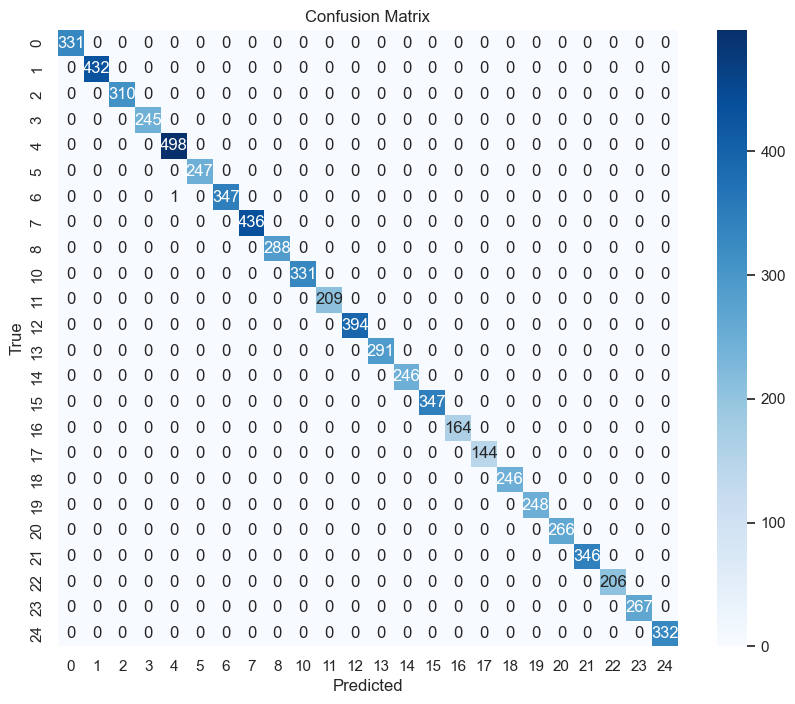

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menampilkan classification report dan confusion matrix
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()